<a href="https://colab.research.google.com/github/JoshK68/Epic_Software/blob/main/MLE_at_Epic_Software_v1_Draft_SAVE_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today you are Machine Learning Engineer@ Epic Software Systems, and your task is to develop a new Recommendation System for the Opthalmologists (eye doctors)!

### Diabetic Retinopathy (DR) is a pathology that impacts patients with Diabetes Mellitus 2, such that vision is compromised. Base paper on Automated classification of diabetic retinopathy:
https://ieeexplore.ieee.org/abstract/document/6680633
### Diabetic Retinopathy classification using modified AlexNet paper: https://www.sciencedirect.com/science/article/abs/pii/S0045790618334190
### Paper available at https://drive.google.com/file/d/1nl5tYA2jJ1Up_malA8uQmvwHu6UH0k-r/view?usp=sharing


### Automated classification of DR severity can help streamlie the treatment process such that patients with higher severity are seen by the doctor first followed by the less severe patiets. This problem of DR clasification is significant since retinal images are biometrics (unique for each individual) which makes generalized modeling difficult and since 90% of the diabetic population that get imaged each year are have NO DR.

# Thus, the primary task is to automatically screen the patients that have NO DR (y=0), vs ones with mild DR (y=1), moderate DR (y=2) and severe DR (y=4). In this assignment you will develop such an automated system such that separates the normal images (y=0) from the non-zero ones (y=1,2,3)

### Mount your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Change your working directory to the one containing this notebook

In [2]:
import os
os.chdir('/content/drive/MyDrive/Datasets/week_5_Epic_Software/')   ###/content/drive/MyDrive/Datasets/week_5_Epic_Software/MLE_at_Epic_Software-v1_Draft_SAVE.ipynb

###The copy 'path' has the longer address which includes this notebooks 'Name'. Delete the Name: MLE_at_Epic_Software-v1_Save
###You just want to put where the 'directory' for this project: 'drive/MyDrive/Datasets/week_5_Epic_Software/'

### Load TensorBoard and related libraries

In [3]:
%load_ext tensorboard
from tensorflow import keras
import os
pwd = os.getcwd()
print(pwd)

/content/drive/MyDrive/Datasets/week_5_Epic_Software


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
#Load the libraries
from datetime import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [6]:
dir_path = '/content/drive/MyDrive/Datasets/week_5_Epic_Software/'

In [7]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Task 0: Get familiar with the data

Number of images = 1194
This image has DR = [3]
Maximum pixel value in image = 223


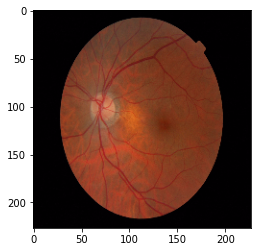

In [8]:
#Read the data and split into train and validation
from sklearn.model_selection import train_test_split
import h5py
f = h5py.File('1194_DR_smallimages (1).h5', 'r') ###drive/MyDrive/Datasets/week_5_Epic_Software/  - so f == the images
images = f['images']
labels = np.array(f['meta'])
print(f'Number of images = {len(labels)}')
#Plot the image and its label
num = 100
plt.imshow(images[num])
print(f"This image has DR = {labels[num]}")
print(f"Maximum pixel value in image = {np.max(images[num])}")

In [9]:
#f is the file

In [10]:
f  #### How can you see that 'images' and 'meta' are the keys???

<HDF5 file "1194_DR_smallimages (1).h5" (mode r)>

In [11]:
f['images']

<HDF5 dataset "images": shape (1194, 227, 227, 3), type "|u1">

In [12]:
f['meta']

<HDF5 dataset "meta": shape (1194, 1), type "|u1">

In [13]:
labels  ###so the metadata should include the labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

# Task 1: Data Pre-processing: 
1. Exploratory data analysis (Frequency of labels)
2. Normalization of images in [0, 1] range.
3. Generation of Training, Test data sets (66/33% split)

### Exercise: Plot a histogram illustrating the number of images corresponding to each DR severity label

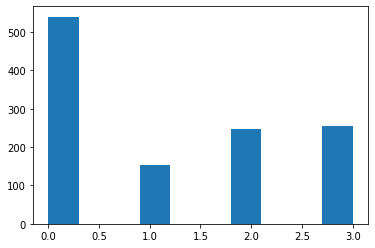

In [14]:
### START CODE HERE ###
plt.hist(labels);    ###plt.hist(labels)

### END CODE HERE ###

### Exercise: Normalize the images' pixel values so they fall in the range [0, 1]

In [15]:
labels.ndim   #

2

In [16]:
labels.shape

(1194, 1)

In [17]:
images.ndim

4

In [18]:
images.shape

(1194, 227, 227, 3)

Maximum pixel value in an image = 1.0


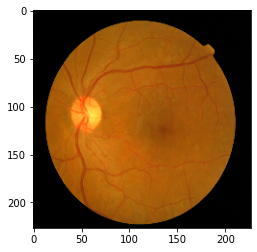

In [19]:
### START CODE HERE ###



images_new = np.asarray(images)/255;        #normalize it
                                            ###convert the images to an array and then divide by 255

#np.divide

### END CODE HERE ###
plt.imshow(images_new[10])
print(f"Maximum pixel value in an image = {np.max(images_new[10])}")

### Exercise: Binarize the class labels. Set up 2 one-hot-encoded columns. Column 0 will contain a 1 for every row where the label is 0. Column 1 will contain a 1 for every row where the label is 1, 2, or 3.

### You might be wondering why we don't use a single one-hot-encoded column, since our problem is binary classification. This will become clear in Task 2, when we inspect the AlexNet architecture. 


In [20]:
labels[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2]], dtype=uint8)

In [21]:
###np.where(labels==0)[0]

In [22]:
### START CODE HERE ###
# Initialize the one-hot-encoded array of labels as 2 columns of zeros
one_hot_labels = np.zeros([len(images), 2])                

# Find the rows where the label is 0
lab0 = np.where(labels==0)[0]         #np.where      ###
# Find the rows where the label is 1, 2, or 3
lab1 = np.where(labels>0)[0]                         ###
# Set column 0 to 1 in the rows where the label is 0
one_hot_labels[lab0, 0] = 1
# Set column 1 to 1 in the rows where the label is 1, 2, or 3
one_hot_labels[lab1, 1] = 1
### END CODE HERE ###

In [23]:
images.shape

(1194, 227, 227, 3)

In [24]:
###Making an array of 'zeros' which will be the length of images
one_hot_labels.shape

(1194, 2)

In [25]:
one_hot_labels  ###2 refers to two columns

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Exercise: Perform a 2/3 - 1/3 train-test split on the data

X_train.shape = (796, 227, 227, 3)
X_test.shape  = (398, 227, 227, 3)


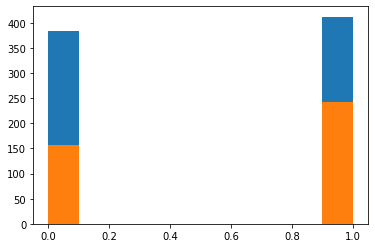

In [26]:
###  ###   ###

### START CODE HERE ###
def split_data(mat, target, train_ratio):   #mat = matrix
    # Get the number of rows in the training data
    train_rows = int(len(mat) * train_ratio)
    # Place the first `train_rows` shuffled rows into the training data 
    # and the remaining rows into the test data
    X_train = mat[:train_rows]    
    X_test  = mat[train_rows:]     ###use mat-matrix here
    Y_train = target[:train_rows]  ###use target/label (0 or 1) here
    Y_test  = target[train_rows:]
    return X_train, X_test, Y_train, Y_test

# Call the function you just defined to create the training and test data
X_train, X_test, Y_train, Y_test = split_data(images_new, target=one_hot_labels, train_ratio=2/3)   ###train_ratio 2/3 for train, 1/3 for test

### END CODE HERE ###
# Visualize the distribution of the binarized labels for both the training and test data
plt.hist(Y_train[:,1])
plt.hist(Y_test[:,1])
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

In [27]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

# Task 2: Model Definition, classification and prediction (No regularization)

## AlexNet architecture

In [28]:
# Define the AlexNet model [This is given]
#1. Model Definition

#TARGET_SIZE = (227, 227)

class AlexNet(Sequential):
   def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                    padding= 'valid', activation= 'relu',
                    input_shape= input_shape, kernel_initializer= 'he_normal'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                          padding= 'valid', data_format= None))
    
    
    self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                          padding= 'valid', data_format= None)) 
    

    self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal'))
    self.add(BatchNormalization())
    
    self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal'))
    self.add(BatchNormalization())
    
    self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal'))
    self.add(BatchNormalization())
    
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                          padding= 'valid', data_format= None))
    

    self.add(Flatten())
    
    self.add(Dense(num_classes, activation= 'softmax'))

    self.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Since our problem involves binary classification, set `num_classes` to 2

In [29]:
num_classes = 2

### Exercise: Instantiate the model and summarize its architecture

In [30]:
TARGET_SIZE = (227, 227)

In [31]:
###from a couple of cells above: def __init__(self, input_shape, num_classes)

In [32]:
### X_train[0] is the first image --- all images should have the same shape

In [33]:
### START CODE HERE ###
model = AlexNet(X_train[0].shape, num_classes=num_classes)   ###
model.summary()
### END CODE HERE ###

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                          

### Exercise: Train the model. If you want to use TensorBoard to visualize how its properties evolve over the training epochs, you'll have to create a log directory and employ a TensorBoard callback. If you'd like, you can implement them in v1 of this notebook, but it's not required. v2 will include them, however.
### In training the model, set aside 20% of the data as a validation set. Use a batch size of 100. Set the output verbosity to 1. Train the model for 40 epochs.

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from helper_functions import *             ### this is how you import the helper functions. I put the helper functions file in the same directory: https://drive.google.com/drive/folders/1dhTLQA3oSJpdf55mjlavz6hwMhIYZQWP

### START CODE HERE ###
training_history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, batch_size=100, verbose=2)
### END CODE HERE ###

print("Average test loss: ", np.average(training_history.history['loss']))

Epoch 1/40
7/7 - 11s - loss: 27.1511 - accuracy: 0.4858 - val_loss: 631062.6250 - val_accuracy: 0.3000 - 11s/epoch - 2s/step
Epoch 2/40
7/7 - 1s - loss: 8.1163 - accuracy: 0.5440 - val_loss: 125228.5781 - val_accuracy: 0.3000 - 549ms/epoch - 78ms/step
Epoch 3/40
7/7 - 1s - loss: 5.9090 - accuracy: 0.5802 - val_loss: 22197.6934 - val_accuracy: 0.3000 - 546ms/epoch - 78ms/step
Epoch 4/40
7/7 - 1s - loss: 2.4044 - accuracy: 0.5896 - val_loss: 6087.4385 - val_accuracy: 0.3000 - 549ms/epoch - 78ms/step
Epoch 5/40
7/7 - 1s - loss: 4.1671 - accuracy: 0.5110 - val_loss: 2436.0444 - val_accuracy: 0.3000 - 551ms/epoch - 79ms/step
Epoch 6/40
7/7 - 1s - loss: 3.6317 - accuracy: 0.5755 - val_loss: 1382.4077 - val_accuracy: 0.3000 - 544ms/epoch - 78ms/step
Epoch 7/40
7/7 - 1s - loss: 2.2710 - accuracy: 0.5833 - val_loss: 756.4154 - val_accuracy: 0.3000 - 542ms/epoch - 77ms/step
Epoch 8/40
7/7 - 1s - loss: 1.4300 - accuracy: 0.5943 - val_loss: 437.2071 - val_accuracy: 0.3000 - 559ms/epoch - 80ms/step

### Exercise: Display loss and accuracy for both the training and validation data. You should find the provided functions in `helper_functions.py` useful. 

In [35]:
#logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [36]:
import helper_functions

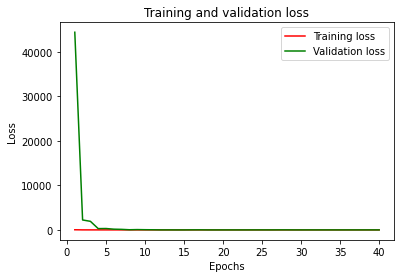

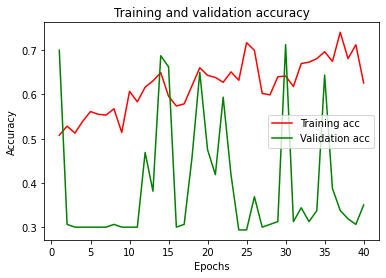

In [ ]:
### START CODE HERE ###
print_loss_history(training_history)
print_accuracy_history(training_history)
### END CODE HERE ###

### Exercise: Generate predictions with the test data

In [37]:
### START CODE HERE ###
prediction_values = model.predict(X_test)    ###Predict off of X_test
### END CODE HERE ###

In [50]:
prediction_values[:5]    ### axis 1 is across (the rows)!
                         ### axis 0 is down - the columns   ###np.shape(1000, 5)????

array([[7.67141208e-02, 9.23285902e-01],
       [8.72854871e-05, 9.99912739e-01],
       [2.21744686e-01, 7.78255284e-01],
       [1.09456934e-01, 8.90543103e-01],
       [7.11051086e-07, 9.99999285e-01]], dtype=float32)

### Exercise: Evaluate the predictions against the Number 1 column of `Y_test`

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [46]:
### START CODE HERE ###
# Import the necessary functions from sklearn.metrics
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print(f'Accuracy = {accuracy_score}')
print(f'F1 = {f1_score}')
print(f'Precision = {precision_score}')            ####
print(f'Recall = {recall_score}')                  ####
# Display the confusion matrix
print('Confusion matrix =')
confusion_matrix
### END CODE HERE ###

Accuracy = <function accuracy_score at 0x7f1cba077a70>
F1 = <function f1_score at 0x7f1cba077e60>
Precision = <function precision_score at 0x7f1ca3a81200>
Recall = <function recall_score at 0x7f1ca3a81290>
Confusion matrix =


<function sklearn.metrics._classification.confusion_matrix>

In [44]:
np.argmax(prediction_values, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

### Next, visualize the activations.
Source: https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

### Exercise: Extract the activations for each layer in our AlexNet model

In [61]:
from keras.models import Model
### START CODE HERE ###
# Use a list comprehension to extract the output of each layer in the model

layer_outputs = [layer.output for layer in model.layers]    ###.output is an attribute of layer

# Define a new model with the same input shape as the original model 
# and layer_outputs as its outputs
activation_model = Model(inputs=model.input, outputs=layer_outputs)   ###the Model class takes 'inputs' and 'outputs'

# Get all the activations by calling the predict() method on the number 10 image 
# in X_train. Make sure to reshape the image so it has a new 0 axis of length 1.   ###
activations = activation_model.predict(X_train[10:11])          ### 10:11 to make it a list and add that extra dimension
### END CODE HERE ###

In [54]:
X_train[11].shape

(227, 227, 3)

In [59]:
X_train[10:11].shape     ###By taking a slice we added a 1 - I believe that it's the length of the slice - yes it it - run X_train[9:11].shape
#So it becomes: length, height, width, color channels

(1, 227, 227, 3)

### Exercise: Display the first 64 activations of the second model layer (layer index 1) in an 8 x 8 grid. Again, the helper functions are your friends.

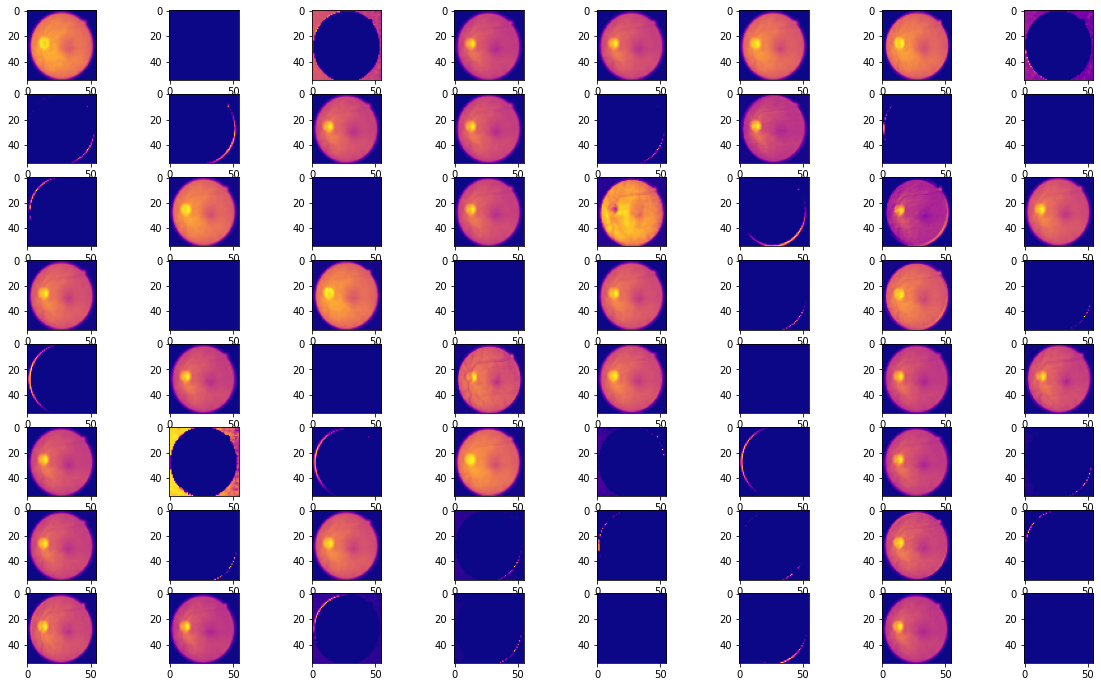

In [65]:
### START CODE HERE ###
display_activation(activations, 8, 8, 1)  #1 for layer 1
### END CODE HERE ###

### Exercise: Display the first 64 activations of the 11th model layer (layer index 10) in an 8 x 8 grid

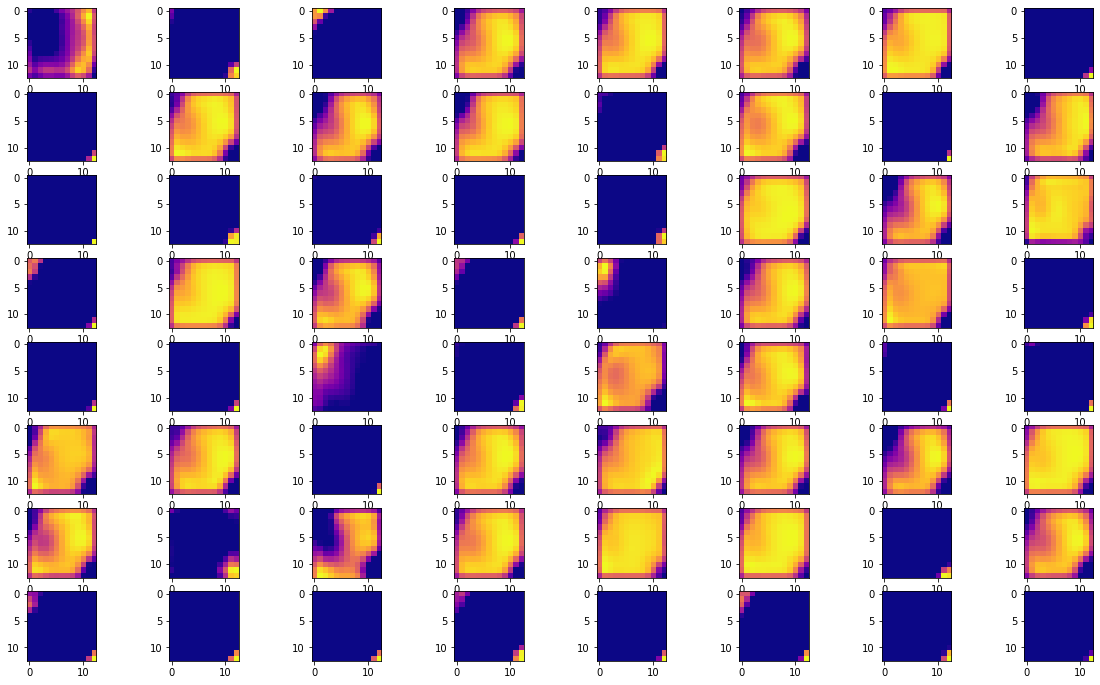

In [66]:
### START CODE HERE ###
display_activation(activations, 8, 8, 10)  #1 for layer 10
### END CODE HERE ###

# Comment on the activated feature maps for early layers to later layers. What pattern do you observe?

# Task 3: Regularization by Data Augmentation [Instructor Led]

## We can regularize our model (and, in doing so, hopefully improve it) by augmenting our image data. Image augmentation includes transformations such as rotation, translation, reflection, shearing, and color permutation. TensorFlow provides the ImageDataGenerator class to perform image augmentation in memory; by default, your local storage won't save the newly generated images.

In [67]:
# Create a Data Generator
data_gen_args = dict( 
    rotation_range=10.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    channel_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    data_format="channels_last",
)
image_datagen = ImageDataGenerator(**data_gen_args)

image_datagen.fit(X_train)
BATCH_SIZE = X_train.shape[0]

### Initialize data generator for training/validation and test data sets

In [68]:
train_generator = image_datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE)
test_generator = image_datagen.flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [ ]:
###Is the above cell the same as flow_from_directory?

### Import libraries and set useful parameters

In [69]:

#from tensorflow.keras.utils import HDF5Matrix
seed = 0
aug_batch_size = 6

## Step 1: Understanding the data augmentation process
Images are randomly generated with the options provided in the image data generator

Epoch 0
(6, 227, 227, 3)


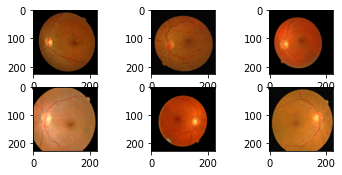

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Epoch 1
(6, 227, 227, 3)


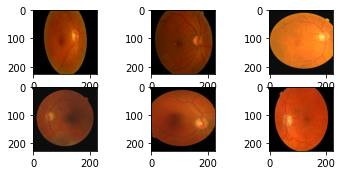

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [74]:
for e in range(2):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in image_datagen.flow(X_train, Y_train, batch_size=aug_batch_size):   ####x_batch, y_batch
                                                                                               ### batch_size = 6 - batch_size - gives it an additional dimension - 6 - number of batches
        print(x_batch.shape)
        for i in range(0, aug_batch_size):
            plt.subplot(330+1 + i)
            plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
        

        plt.show()
        print(y_batch)
        break

## Step 2: Using augmented data to Train the model
### Visualize using tensorboard

### Method 1: Iterate through randomized `(X, y)` batches generated by `train_generator` and fit AlexNet to each one

In [75]:
model_reg = AlexNet((np.shape(X_train)[1],np.shape(X_train)[2], 3), num_classes)

In [78]:
#train_generator = image_datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE)
#test_generator = image_datagen.flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [80]:
len(X_train)   #number of images in X_train dataset

796

In [81]:
#Method 1: Randomized batches
EPOCHS = 3
reg_history_loss = []
reg_history_vloss = []
reg_history_accuracy = []
reg_history_val_accuracy = []
# Start training
for e in range(EPOCHS):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in train_generator:
        reg_hist = (model_reg.fit(x_batch, y_batch,validation_split=0.2, verbose=1))    ###fit it here
        batches += 1                                                                    ###increment batches so that it will stop   --- line 18
        reg_history_loss.append(reg_hist.history['loss'])
        reg_history_vloss.append(reg_hist.history['val_loss'])
        reg_history_accuracy.append(reg_hist.history['accuracy'])
        reg_history_val_accuracy.append(reg_hist.history['val_accuracy'])
        if batches >= len(X_train) / BATCH_SIZE:                                        ###incremement batches so that it will stop
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break  




Epoch 0
20/20 [==============================] - 1s 47ms/step - loss: 1.2613 - accuracy: 0.5189 - val_loss: 1.6328 - val_accuracy: 0.4688
Epoch 1
20/20 [==============================] - 1s 43ms/step - loss: 1.5039 - accuracy: 0.5362 - val_loss: 1.2845 - val_accuracy: 0.5437
Epoch 2
20/20 [==============================] - 1s 40ms/step - loss: 1.1986 - accuracy: 0.5220 - val_loss: 1.4892 - val_accuracy: 0.5125


### Plot the losses and accuracies for both training and validation data

In [82]:
reg_history_loss

[[1.2613286972045898], [1.503943681716919], [1.1985721588134766]]

In [83]:
print(np.array(reg_history_loss))

[[1.2613287 ]
 [1.50394368]
 [1.19857216]]


In [86]:
np.array(reg_history_loss).shape   ### squeeze out that 1 which stands for 1 column - doesn't provide any important info??? ???

(3, 1)

In [90]:
print(np.squeeze(np.array(reg_history_loss)))   ###squeezes out that extra [] which is also the 1 which doesn't give any vital info???

[1.2613287  1.50394368 1.19857216]


In [87]:
#Print the loss and accuracies
#print_loss_history(reg_history)
t_loss = np.squeeze(np.array(reg_history_loss))
v_loss = np.squeeze(np.array(reg_history_vloss))
t_acc  = np.squeeze(np.array(reg_history_accuracy))
v_acc  = np.squeeze(np.array(reg_history_val_accuracy))
print(len(t_loss))

3


### Loss

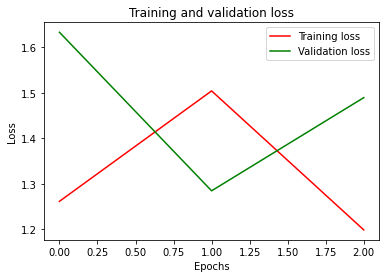

In [91]:
epochs = range(len(t_loss))
plt.plot(epochs, t_loss, color='red', label='Training loss')
plt.plot(epochs, v_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy

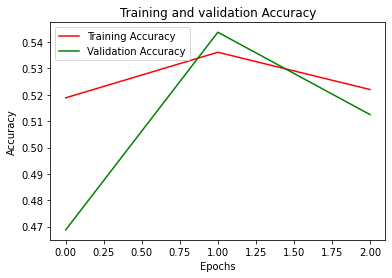

In [92]:
epochs=range(len(t_acc))
plt.plot(epochs, t_acc, color='red', label='Training Accuracy')
plt.plot(epochs, v_acc, color='green', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Method 2: Pass `train_generator` into the model's `fit()` method directly and abstract away the looping

In [93]:
#Method 2
model_reg_2 = AlexNet((np.shape(X_train)[1],np.shape(X_train)[2], 3), num_classes)
reg_history = model_reg_2.fit(
    train_generator,
    steps_per_epoch=50,
    verbose=1, 
    epochs=40,
#    callbacks=[tensorboard_callback]
)

print("Average test loss: ", np.average(reg_history.history['loss']))

Epoch 1/40
50/50 [==============================] - 15s 2ms/step - loss: 1.2733 - accuracy: 0.5075
Average test loss:  1.2732579708099365


In [94]:
# save the whole model
model_reg_2_dir = "reg_model.h5"
model_reg_2.save(model_reg_2_dir)

In [ ]:
%tensorboard --logdir logs/scalars

# Task 4: Evaluate the Regularized Model and Report Results

### Exercise: Compute the evaluation metrics

In [96]:
### START CODE HERE ###
prediction_reg = model_reg_2.predict(X_test)
print(f'Accuracy = {accuracy_score}')
print(f'F1 = {f1_score}')
print(f'Precision = {precision_score}')
print(f'Recall = {recall_score}')
print('Confusion matrix = ')
confusion_matrix
### END CODE HERE ###


####   #### function accuracy_score...

Accuracy = <function accuracy_score at 0x7f1cba077a70>
F1 = <function f1_score at 0x7f1cba077e60>
Precision = <function precision_score at 0x7f1ca3a81200>
Recall = <function recall_score at 0x7f1ca3a81290>
Confusion matrix = 


<function sklearn.metrics._classification.confusion_matrix>

# Visualize activations from early layers after regularization and report results

# **Summary and Discussion:** **Discuss** "What would you report back as best model for prediction?" 
# Think in terms of Data, Process and Outcomes specifically.
# As you move to Deep Learning applications, Kernel crashes will get common, thats completely normal! And this will help plan paramaters to still run your algorithm without a kernel crash (rucing batch size and number of epochs).
## Consider the following:
1. Can you pre-process the data in some other way? 
2. Given a new data set on the job, how would you report the best "method"? What are the steps to always follow? 
3. What is the metric/metrics you would use to report your results?

#Share screen and discuss findings. Think about generalizability (something that works across data sets)